# ch05.07. 기초모델 구현 - Logistic Regression
---
* 날짜:
* 이름:

## 학습내용
    - 로지스틱 회귀 프로세스에 대해 이해한다
    - 시그모이드 함수를 구현한다

```
import numpy as np
import matplotlib.pyplot as plt
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/content/drive/MyDrive')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from data_loader import iris_loader

In [4]:
a = np.random.normal(0,0.1)
a

-0.01780073395689342

In [17]:
np.log(0.00000000000000000000000000000000000000000000000000000000000000000000000001)

-170.39129688155938

In [6]:
a = np.random.RandomState(1)
a.normal(0,0.01,4)

array([ 0.01624345, -0.00611756, -0.00528172, -0.01072969])

## 클래스 작성
---

In [7]:
class LogisticRegressionGD():
  def __init__(self, lr=0.01, random_state=1):
    self.lr=lr
    self.seed = np.random.RandomState(random_state)

  def init_weights(self, X):
    size=X.shape[1]
    self.w = self.seed.normal(0,0.01,size+1)

  def linear(self, X):
    return np.dot(X, self.w[:-1])+self.w[-1]

  def sigmoid(self, X):
    return 1/(1+np.exp(-X))

  def model(self, X):
    z = self.linear(X)
    y_hat = self.sigmoid(z)
    return y_hat

  def loss(self, y, y_hat):
    return -1/len(y) * np.sum(y * np.log(y_hat) + (1-y) * (np.log(1-y_hat)))
  
  def predict(self, X):
    y_hat=self.model(X)
    logit=np.where(y_hat>=0.5,1,0)
    return logit

  def accuracy(self, y, y_logit):
    return np.count_nonzero(y==y_logit)/len(y)

  def evaluate(self, X, y):
    y_hat = self.model(X) 
    loss=self.loss(y, y_hat)

    y_logit = self.predict(X)
    acc=self.accuracy(y,y_logit)
    return loss, acc


  def fit(self, X, y, epochs=10, show_params=False):

    self.init_weights(X)
    self.history=dict(loss=[], acc=[]) 

    for epoch in range(epochs):
      y_hat = self.model(X)
      self.w[:-1]+= self.lr * np.dot(X.T,(y-y_hat))
      self.w[-1] += self.lr * np.sum(y-y_hat)

      # 평가 및 결과 저장
      loss, acc = self.evaluate(X, y)
      self.history['loss'].append(loss)
      self.history['acc'].append(acc)
      print(f'[Epoch {epoch}] loss: {np.round(loss,2)}  acc: {np.round(acc,2)}')
      if show_params: print(self.w)

  # 데이터 흐름 시각화
  def draw_dflow(self, X, y, title='', figsize=(8,4)):
    y_hat = self.model(X)
    y_pred = self.predict(X)

    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(y, label='y', marker='o')
    plt.plot(y_hat, label='$\hat{y}$', marker='.', linestyle='--')
    plt.plot(y_pred, label='$\logit$', marker='.', linestyle='--')
    plt.legend()
    plt.show()

  # 학습 곡선 시각화
  def draw_lcurve(self, title='', figsize=(8,4)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(self.history['acc'], label='acc', marker='o')
    plt.plot(self.history['loss'], label='loss', marker='o')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

## iris 데이터로 분류 진행
---

### **데이터 로드**

In [8]:
X_train, X_test, y_train, y_test = iris_loader(2)

(150, 4) (150,) [5.1 3.5 1.4 0.2] 0
(75, 4) (25, 4) (75,) (25,)


### **학습전 성능 평가**

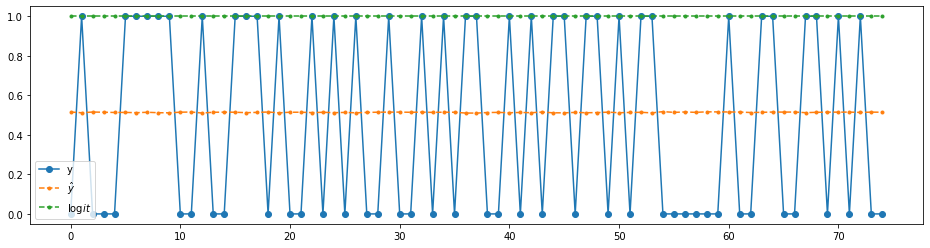

성능:(loss, acc)  (0.6971611251403647, 0.4666666666666667)


In [9]:
model = LogisticRegressionGD()

model.init_weights(X_train)
model.draw_dflow(X_train, y_train, figsize=(16,4))
print('성능:(loss, acc) ', model.evaluate(X_train, y_train))

### **학습**

In [10]:
history = model.fit(X_train, y_train, epochs=15)

[Epoch 0] loss: 0.72  acc: 0.47
[Epoch 1] loss: 4.36  acc: 0.53
[Epoch 2] loss: 3.61  acc: 0.47
[Epoch 3] loss: 2.53  acc: 0.53
[Epoch 4] loss: 3.88  acc: 0.47
[Epoch 5] loss: 0.87  acc: 0.55
[Epoch 6] loss: 2.57  acc: 0.47
[Epoch 7] loss: 0.96  acc: 0.56
[Epoch 8] loss: 1.46  acc: 0.47
[Epoch 9] loss: 0.51  acc: 0.71
[Epoch 10] loss: 0.07  acc: 1.0
[Epoch 11] loss: 0.01  acc: 1.0
[Epoch 12] loss: 0.01  acc: 1.0
[Epoch 13] loss: 0.01  acc: 1.0
[Epoch 14] loss: 0.01  acc: 1.0


### **학습 후 성능평가**

성능:(loss, acc)  (0.006335745985910151, 1.0)


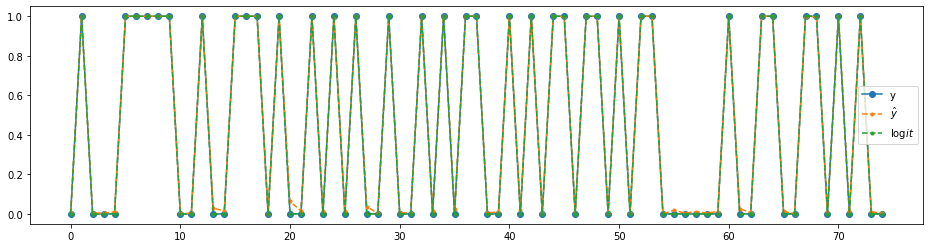

In [11]:
print('성능:(loss, acc) ', model.evaluate(X_train, y_train))
model.draw_dflow(X_train, y_train, figsize=(16,4))

### **테스트셋 성능평가**

성능:  (0.0021715991734696776, 1.0)


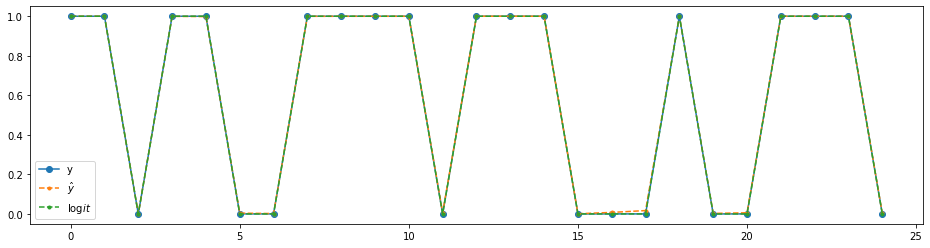

In [12]:
print('성능: ', model.evaluate(X_test, y_test))
model.draw_dflow(X_test, y_test, figsize=(16,4))

### **학습곡선**

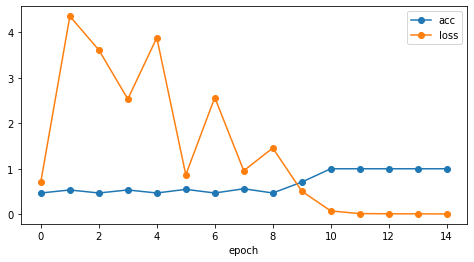

In [13]:
model.draw_lcurve()

### **하이퍼파라미터에 따른 성능평가**

In [14]:
for lr in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
  model = LogisticRegressionGD(lr=lr)
  history = model.fit(X_train, y_train, epochs=15)
  print(f'===== lr {lr} ==== {model.evaluate(X_test, y_test)}')

[Epoch 0] loss: 0.7  acc: 0.47
[Epoch 1] loss: 0.7  acc: 0.47
[Epoch 2] loss: 0.7  acc: 0.47
[Epoch 3] loss: 0.7  acc: 0.47
[Epoch 4] loss: 0.7  acc: 0.47
[Epoch 5] loss: 0.7  acc: 0.47
[Epoch 6] loss: 0.69  acc: 0.47
[Epoch 7] loss: 0.69  acc: 0.47
[Epoch 8] loss: 0.69  acc: 0.47
[Epoch 9] loss: 0.69  acc: 0.47
[Epoch 10] loss: 0.69  acc: 0.47
[Epoch 11] loss: 0.69  acc: 0.47
[Epoch 12] loss: 0.69  acc: 0.47
[Epoch 13] loss: 0.69  acc: 0.47
[Epoch 14] loss: 0.69  acc: 0.47
===== lr 1e-05 ==== (0.6834768193886234, 0.6)
[Epoch 0] loss: 0.69  acc: 0.47
[Epoch 1] loss: 0.69  acc: 0.47
[Epoch 2] loss: 0.69  acc: 0.47
[Epoch 3] loss: 0.68  acc: 0.47
[Epoch 4] loss: 0.68  acc: 0.47
[Epoch 5] loss: 0.68  acc: 0.47
[Epoch 6] loss: 0.67  acc: 0.47
[Epoch 7] loss: 0.67  acc: 0.47
[Epoch 8] loss: 0.67  acc: 0.47
[Epoch 9] loss: 0.66  acc: 0.48
[Epoch 10] loss: 0.66  acc: 0.48
[Epoch 11] loss: 0.66  acc: 0.52
[Epoch 12] loss: 0.65  acc: 0.57
[Epoch 13] loss: 0.65  acc: 0.67
[Epoch 14] loss: 0.65  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply
